#### ***What is Linear Regression?***



*   A supervised, statistical method used to define to relationship between an independent variable and the dependent variable(s) (Kanade, 2023).
*   It is mainly used for machine learning to predict a value or outcome based on the relationships between the features in the dataset (Kanade, 2023).


#### ***Dependencies***

* The following libraries and modules will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from matplotlib import ticker


#### ***The Dataset***



*   The following dataset contains a collection of sales data samples from a car dealership.
*   The goal of our model is to provide an estimated `selling_price` amount (in dollars) based on the values of the `name`, `year`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`, `seats`, `max_power (in bph)`, `Mileage Unit`, `Mileage` and `Engine (CC)`.
* Predictive analytics makes use of regression techniques to discover trends or patterns in our data (Hillier, 2023).
* Hence, a linear regression model will be used on our dataset to predict our `selling_price` target.
* Data source URL (Kaggle):  https://www.kaggle.com/datasets/jacksondivakarr/sample34.


**Reading the data from the** `.csv` **file.**

In [2]:
MY_DF = pd.read_csv(r'https://raw.githubusercontent.com/ST10437317/kpillay-firstrepo-vc/main/ST10437317_CAR_PRICES_DATA.csv', index_col = 0)
MY_DF = MY_DF.set_index(np.arange(0, 2095))
MY_DF

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,Maruti,2017,425000,12000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,23.10,998
2091,Toyota,2014,425000,50000,Diesel,Individual,Manual,First Owner,5,67.06,kmpl,23.59,1364
2092,Maruti,2011,200000,73000,Petrol,Individual,Manual,First Owner,5,46.30,kmpl,19.70,796
2093,Maruti,2017,360000,80000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,20.51,998


#### ***Exploratory Data Analysis***

* Firstly, we are going to look at the data types of our features to find out if any additional data re-formatting is required later on.



**Dataset Information:**

* Contains `2095` observations.
* No `null` values are initially present.
* Contains 7 numerical fields (including `int64` and `float64` fields):  `year`, `selling_price`, `km_driven`, `seats`, `max_power (in bph)`, `Mileage` and `Engine (CC)`.
* Contains 6 categorical fields: `name`, `fuel`, `seller_type`, `transmission`, `owner` and `Mileage Unit`.

In [3]:
MY_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2095 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2095 non-null   object 
 1   year                2095 non-null   int64  
 2   selling_price       2095 non-null   int64  
 3   km_driven           2095 non-null   int64  
 4   fuel                2095 non-null   object 
 5   seller_type         2095 non-null   object 
 6   transmission        2095 non-null   object 
 7   owner               2095 non-null   object 
 8   seats               2095 non-null   int64  
 9   max_power (in bph)  2095 non-null   float64
 10  Mileage Unit        2095 non-null   object 
 11  Mileage             2095 non-null   float64
 12  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 221.0+ KB


**Replacing** `owner` **values**

* Here, we are renaming the values in the `owner` column using a `dict`
 (Stack Overflow, 2014).

In [4]:
MY_DF['owner'].unique()
RENAME = {'First Owner': 'First-Hand', 'Second Owner': 'Second-Hand', 'Third Owner' : 'Third-Hand', 'Fourth & Above Owner' : 'Fourth-Hand+'}
MY_DF['owner'] = MY_DF['owner'].map(RENAME).fillna(MY_DF['owner'])

**Data Visualization**

* Here we are graphicaly plotting each independent variable against the dependent variable to determine their relationship to the target value.
* I calculated the mean(average) `selling_price` value by: `name`, `year`, `fuel`, `seller_type`, `transmission`, `owner`, `seats` and `Mileage Unit` using the *Pandas* `groupby()` method.
* Certain field values were returned in scientific notation.
* This (Stack Overflow, 2020) forum showed me how to suppress scientific notation values.
* Each group is then plotted as a bar graph (GeeksforGeeks, 2024).

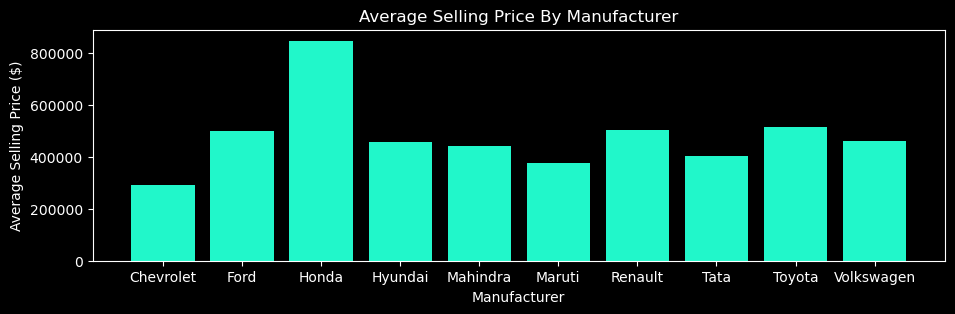

In [5]:
NAME_AVG = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['name']).mean()).reset_index()

plt.style.use('dark_background')
plt.figure(figsize = (11, 3))
plt.bar(NAME_AVG['name'], NAME_AVG['selling_price'], color = '#21F7CA')
plt.title("Average Selling Price By Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel('Average Selling Price ($)')
plt.show()

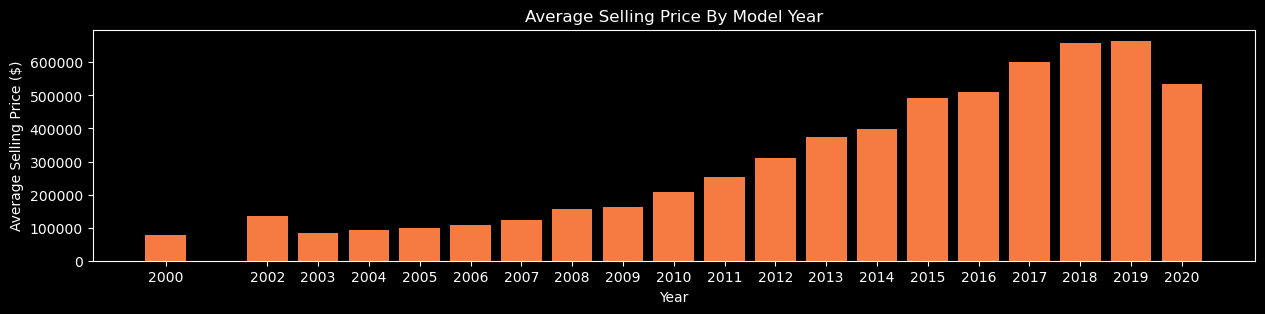

In [6]:
SALES_AVG = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['year']).mean()).reset_index()

plt.figure(figsize = (15, 3))
plt.bar(SALES_AVG['year'], SALES_AVG['selling_price'], color = '#f57b42')
plt.title("Average Selling Price By Model Year")
plt.xlabel("Year")
plt.xticks(SALES_AVG['year'])
plt.ylabel('Average Selling Price ($)')
plt.show()

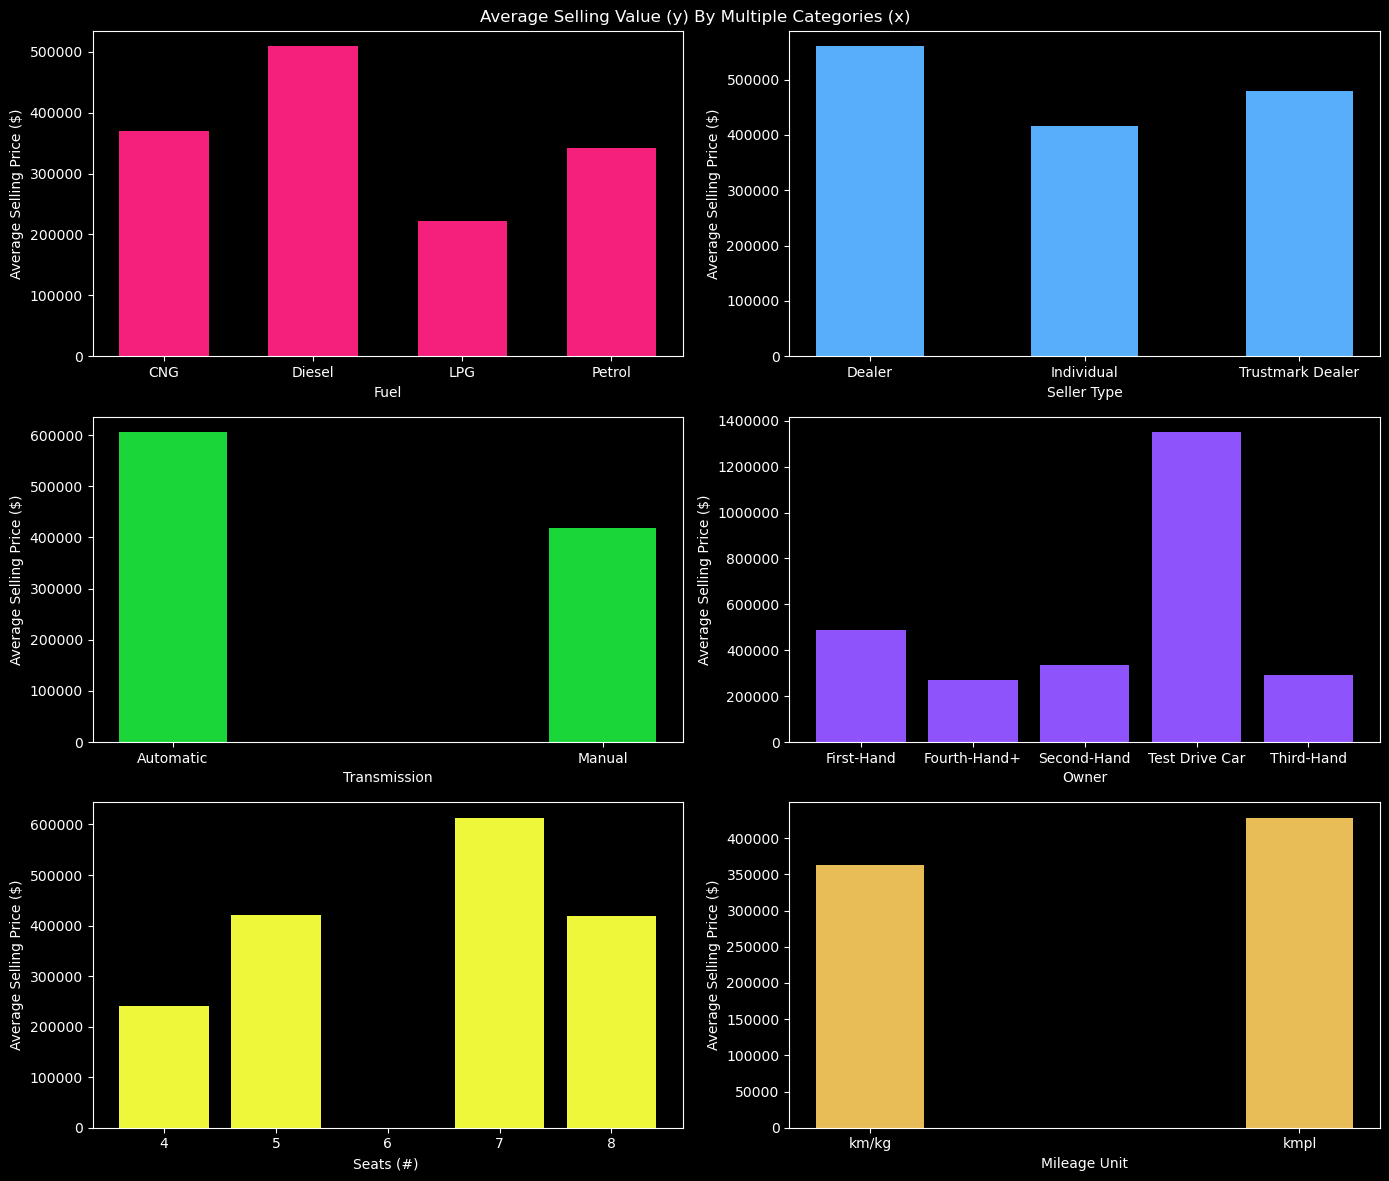

In [7]:
FUEL_AVG    = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['fuel']).mean()).reset_index()
SELLER_AVG  = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['seller_type']).mean()).reset_index()
TRANS_AVG   = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['transmission']).mean()).reset_index()
OWNER_AVG   = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['owner']).mean()).reset_index()
SEATS_AVG   = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['seats']).mean()).reset_index()
MILEAGE_AVG = pd.DataFrame(MY_DF['selling_price'].groupby(MY_DF['Mileage Unit']).mean()).reset_index()

formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 12))
fig.suptitle('Average Selling Value (y) By Multiple Categories (x)')

ax1.bar(FUEL_AVG['fuel'], FUEL_AVG['selling_price'], color = '#f5207c', width = 0.6)
ax1.set_xlabel('Fuel')
ax1.set_ylabel('Average Selling Price ($)')

ax2.bar(SELLER_AVG['seller_type'], SELLER_AVG['selling_price'], color = '#57aefa', width = 0.5)
ax2.set_xlabel('Seller Type')
ax2.set_ylabel('Average Selling Price ($)')

ax3.bar(TRANS_AVG['transmission'], TRANS_AVG['selling_price'], color = '#1ad639', width = 0.25)
ax3.set_xlabel('Transmission')
ax3.set_ylabel('Average Selling Price ($)')

ax4.bar(OWNER_AVG['owner'], OWNER_AVG['selling_price'], color = '#8f53fc')
ax4.set_xlabel('Owner')
ax4.set_ylabel('Average Selling Price ($)')
ax4.yaxis.set_major_formatter(formatter)

ax5.bar(SEATS_AVG['seats'], SEATS_AVG['selling_price'], color = '#eef739')
ax5.set_xlabel('Seats (#) ')
ax5.set_ylabel('Average Selling Price ($)')

ax6.bar(MILEAGE_AVG['Mileage Unit'], MILEAGE_AVG['selling_price'], color = '#e8bd58', width = 0.25)
ax6.set_xlabel('Mileage Unit')
ax6.set_ylabel('Average Selling Price ($)')

fig.tight_layout()
plt.show()

#### ***Data Preprocessing***

* As mentioned before, there are six non-numerical data fields present in our dataset.
* I will be using the  `LabelEncoder.fit_transform()` method from the `sklearn.preprocessing` module to convert the categorical values into numbers (GeeksforGeeks, 2023).
* I used a for-loop to apply the method to each of the columns and placed the transformed arrays in another list.


In [8]:
L_ENCODE              = LabelEncoder()
COLUMN_LIST           = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Mileage Unit']
NUM_ENCODED_COLS_LIST = []

for CAT_COLUMN in COLUMN_LIST:
  NUM_COL_ARR = L_ENCODE.fit_transform(MY_DF[CAT_COLUMN])
  NUM_ENCODED_COLS_LIST.append(NUM_COL_ARR)

NAME_ARR, FUEL_ARR, SELLER_TYPE, TRANSMISSION_ARR, OWNER_ARR, MILEAGE_ARR = NUM_ENCODED_COLS_LIST

* Lastly, I replaced the previous data values with numerically-encoded equivalent values (each number represents the category or class of the original values).
* I also converted the `int64` columns to `float64` type so that every field has the same numeric datatype to ensure the data is standardized.

In [9]:
MY_DF.replace(MY_DF['name'].values, np.float64(NAME_ARR), inplace = True)
MY_DF.replace(MY_DF['fuel'].values, np.float64(FUEL_ARR), inplace = True)
MY_DF.replace(MY_DF['seller_type'].values, np.float64(SELLER_TYPE), inplace = True)
MY_DF.replace(MY_DF['transmission'].values, np.float64(TRANSMISSION_ARR), inplace = True)
MY_DF.replace(MY_DF['owner'].values, np.float64(OWNER_ARR), inplace = True)
MY_DF.replace(MY_DF['Mileage Unit'].values, np.float64(MILEAGE_ARR), inplace = True)

INT_COLS = ['year', 'selling_price', 'km_driven', 'seats', 'Engine (CC)']
for INT_COL in INT_COLS:
  MY_DF[INT_COL] = MY_DF[INT_COL].astype('float64')

**Dataset (After Preprocessing)**

* Below is a sample of the transformed dataset.
* Every column is now of `float64` type.

In [10]:
MY_DF.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,5.0,2014.0,450000.0,145500.0,1.0,1.0,1.0,0.0,5.0,74.00,1.0,23.40,1248.0
1,3.0,2010.0,225000.0,127000.0,1.0,1.0,1.0,0.0,5.0,90.00,1.0,23.00,1396.0
2,3.0,2017.0,440000.0,45000.0,3.0,1.0,1.0,0.0,5.0,81.86,1.0,20.14,1197.0
3,8.0,2011.0,350000.0,90000.0,1.0,1.0,1.0,0.0,5.0,67.10,1.0,23.59,1364.0
4,1.0,2013.0,200000.0,169000.0,1.0,1.0,1.0,0.0,5.0,68.10,1.0,20.00,1399.0
5,3.0,2012.0,500000.0,53000.0,1.0,1.0,1.0,2.0,5.0,90.00,1.0,23.00,1396.0
6,5.0,2002.0,150000.0,80000.0,3.0,1.0,1.0,2.0,5.0,46.30,1.0,19.70,796.0
7,3.0,2016.0,680000.0,100000.0,1.0,1.0,1.0,0.0,5.0,88.73,1.0,22.54,1396.0
8,4.0,2011.0,174000.0,100000.0,1.0,1.0,1.0,2.0,5.0,64.10,1.0,21.00,1461.0
9,5.0,2012.0,600000.0,72000.0,1.0,1.0,1.0,0.0,5.0,88.80,1.0,21.50,1248.0


In [11]:
MY_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2095 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2095 non-null   float64
 1   year                2095 non-null   float64
 2   selling_price       2095 non-null   float64
 3   km_driven           2095 non-null   float64
 4   fuel                2095 non-null   float64
 5   seller_type         2095 non-null   float64
 6   transmission        2095 non-null   float64
 7   owner               2095 non-null   float64
 8   seats               2095 non-null   float64
 9   max_power (in bph)  2095 non-null   float64
 10  Mileage Unit        2095 non-null   float64
 11  Mileage             2095 non-null   float64
 12  Engine (CC)         2095 non-null   float64
dtypes: float64(13)
memory usage: 221.0 KB


**Correlation Matrix**

* Used to determine the strength of the relationships between our variables (Ebrahim, 2023).

**Note:** Only `year`, `seats`, `max_power (in bph)`, `Mileage Unit`, `Mileage` and `Engine (CC)` seem to have a positive significance to the `selling_price` values. 

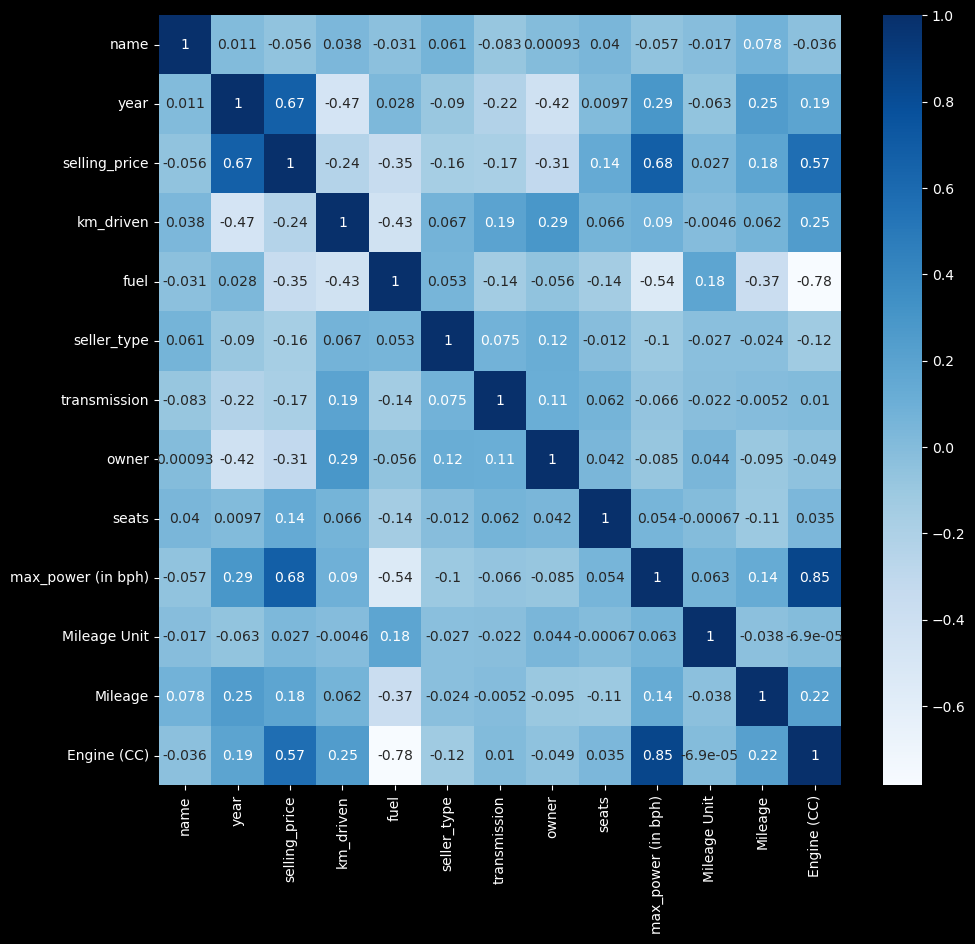

In [12]:
plt.figure(figsize = (11, 10))
sns.heatmap(MY_DF.corr(), cmap = "Blues", annot = True)
plt.tight_layout
plt.show()

#### ***The Regression Model***

**Class Instance**

* No changes in the default parameters have been made.

In [13]:
LR_MODEL = LinearRegression()
LR_MODEL;

**User-Defined Evaluation Function**

* This function takes the actual labels and the predicted labels as arguments and outputs the relevant regression metrics which will be used to measure the **reliability** of our model.

In [14]:
def model_eval(y_true, y_preds):
  print(f"R-Squared Score:     {r2_score(y_true, y_preds)}")
  print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_preds)}")

**Training And Testing Splitting**

* The `selling_price` target column is dropped
* Training size is **80%** and testing size is **20%** of the total observations.
* All the columns (fields) that have a negative significance to the target variable (y) are dropped to reduce noise.

In [15]:
X = MY_DF.drop(columns = ['name', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'])
y = MY_DF['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1676, 419, 1676, 419)

**Dependent variables**

In [16]:
X

,year,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,2014.0,5.0,74.00,1.0,23.40,1248.0
1,2010.0,5.0,90.00,1.0,23.00,1396.0
2,2017.0,5.0,81.86,1.0,20.14,1197.0
3,2011.0,5.0,67.10,1.0,23.59,1364.0
4,2013.0,5.0,68.10,1.0,20.00,1399.0
...,...,...,...,...,...,...
2090,2017.0,5.0,67.04,1.0,23.10,998.0
2091,2014.0,5.0,67.06,1.0,23.59,1364.0
2092,2011.0,5.0,46.30,1.0,19.70,796.0
2093,2017.0,5.0,67.04,1.0,20.51,998.0


**Fitting**

In [17]:
LR_MODEL.fit(X_train, y_train);

**Predictions**

* Since the predictions are decimal values and the actual labels are in thousands with no decimal places, we need to round off the prediction values.

* Below are 1676 `selling_price` training estimations compared to the actual values.

In [18]:
training_preds = LR_MODEL.predict(X_train).round(-3)
pd.DataFrame({'Train Actual': y_train, 'Train Predictions': training_preds})

,Train Actual,Train Predictions
30,615000.0,637000.0
1178,270000.0,298000.0
1628,110000.0,-117000.0
764,350000.0,480000.0
1317,430000.0,364000.0
...,...,...
1638,275000.0,346000.0
1095,565000.0,589000.0
1130,267000.0,357000.0
1294,600000.0,643000.0


* Below are 419 `selling_price` testing estimations compared to the actual values.

In [19]:
test_preds = LR_MODEL.predict(X_test).round(-3)
pd.DataFrame({'Test Actual': y_test, 'Test Predictions': test_preds})

,Test Actual,Test Predictions
210,1050000.0,831000.0
1169,600000.0,520000.0
1146,395000.0,462000.0
879,493000.0,575000.0
29,185000.0,154000.0
...,...,...
1941,690000.0,667000.0
1337,320000.0,494000.0
2083,450000.0,588000.0
393,869999.0,725000.0


#### ***Model Evaluation***

**Training metrics**

In [20]:
model_eval(y_train, training_preds)

R-Squared Score:     0.7136730100874247
Mean Absolute Error: 95270.56682577566


**Testing metrics**

In [21]:
model_eval(y_test, test_preds)

R-Squared Score:     0.7235255496247788
Mean Absolute Error: 87453.48687350836


**Outcome(s):**



*   The model is **neither** overfitting **nor** underfitting, since there is not a big difference in the R-Squared value for the training and testing predictions.
* The testing R-Squared value is approximately `0.72` (a strong correlation fit, defined by the model for a dataset with this level of complexity)  (Allwright, 2022).
*   The Mean Absolute Error value of our model states that our estimations have an average difference of approximately `+/- 87000` dollars compared to the actual values.



#### ***References***

* Allwright, S., 2022. What is a good R-Squared value? (simply explained). [Online]
Available at: https://stephenallwright.com/good-r-squared-value/
[Accessed 07 April 2024].

* Ebrahim, M., 2023. Python correlation matrix tutorial (Using Pandas). [Online] 
Available at: https://likegeeks.com/python-correlation-matrix/
[Accessed 08 April 2024].

* GeeksforGeeks, 2023. Label Encoding in Python. [Online]
Available at: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
[Accessed 05 April 2024].

* GeeksforGeeks, 2024. Matplotlib.pyplot.subplots() in Python. [Online]
Available at: https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/
[Accessed 06 April 2024].

* Hillier, W., 2023. What is Linear Regression? A Complete Introduction. [Online]
Available at: https://careerfoundry.com/en/blog/data-analytics/what-is-linear-regression/
[Accessed 05 April 2024].

* Kanade, V., 2023. What Is Linear Regression? Types, Equation, Examples, and Best Practices for 2022. [Online]
Available at: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/
[Accessed 6 April 2024].

* Stack Overflow, 2014. Replacing column values in a pandas DataFrame. [Online]
Available at: https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
[Accessed 05 April 2024].

* Stack Overflow, 2020. Matplotlib: setting the Y-axis to none scientific notation AFTER changing the Y-axis to log scale. [Online]
Available at: https://stackoverflow.com/questions/60685751/matplotlib-setting-the-y-axis-to-none-scientific-notation-after-changing-the-y
[Accessed 06 April 2024].




